# Bagging Regressor 
## Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")
df.head(4)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67


# Separte Input and Output

In [3]:
x = df.iloc[:,:-1]
y = df["package"]

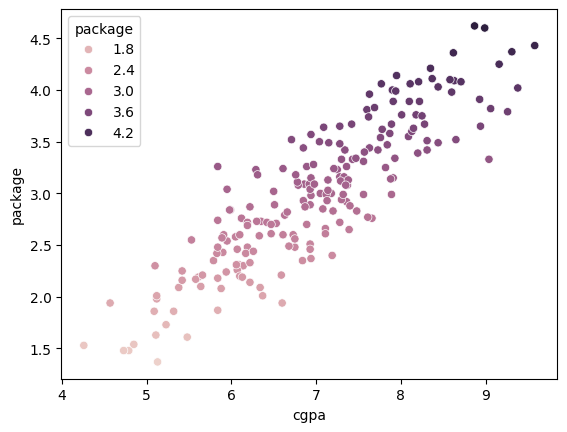

In [4]:
sns.scatterplot(x="cgpa", y="package", data=df, hue="package")
plt.show()

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

# Bagging Regressor

In [9]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [10]:
bg = BaggingRegressor(estimator=LinearRegression(), n_estimators=40)  # Estimaotor we must given in bagging
bg.fit(x_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=40)

In [11]:
# Accuracy scores
train_score = bg.score(x_train, y_train) * 100
test_score = bg.score(x_test, y_test) * 100

# Print with labels
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

Training Accuracy: 77.57%
Testing Accuracy: 77.19%


# 🛠 Why We Use `estimator` in Bagging?

## 📌 What is Bagging?
Bagging (**Bootstrap Aggregating**) is an **ensemble technique** that trains multiple models on different bootstrap samples and then combines their predictions.

But Bagging itself is **not a model** — it is a **meta-algorithm**.  
That’s why it needs to know:  
👉 *Which base learner (estimator) should I train on each bootstrap sample?*

---

## 🔧 Role of `estimator`
The `estimator` parameter tells Bagging **what type of model to use** as the base learner.

- If we set `estimator=DecisionTreeRegressor()` → Bagging trains many Decision Trees.  
- If we set `estimator=LinearRegression()` → Bagging trains many Linear Regression models.  
- If we set `estimator=KNeighborsRegressor()` → Bagging trains many KNN models.  

So, `estimator` = the **base model** that Bagging will replicate and combine.

---


# Random Forest

In [14]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [15]:
# Accuracy scores
train_score = rf.score(x_train, y_train) * 100
test_score = rf.score(x_test, y_test) * 100

# Print with labels
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

Training Accuracy: 90.25%
Testing Accuracy: 61.28%
